In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

/Users/muddy_flesh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def increase_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] += 1
    return A_modified

In [4]:
def decrease_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] -= 1
    return A_modified

In [5]:
def get_neighbor(indices,L):
    neighbor_index = []
    for j in range(len(indices)):
        if (indices[j] == 0):
            neighbor_index.append(increase_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = L-1
            neighbor_index.append(indice_copy)
        elif (indices[j] == L-1):
            neighbor_index.append(decrease_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = 0
            neighbor_index.append(indice_copy)
        else:
            neighbor_index.append(increase_entry_by_one(indices, j))
            neighbor_index.append(decrease_entry_by_one(indices, j))
    return neighbor_index

In [6]:
def overlap(S1,S2,N):
    return np.sum(S1*S2)/N

def sweep(S,L,N):
    sweep1 = 0
    while sweep1 < N:
        indices1 = [np.random.choice(dim) for dim in S.shape]
        spin1 = S[tuple(indices1)]
        neighbor_index1 = get_neighbor(indices1,L)
        neighbor1 = np.array([S[tuple(index)] for index in neighbor_index1])
        beforeE1 = np.sum(spin1*neighbor1)
        afterE1 = np.sum((-spin1)*neighbor1)
        deltaE1 = afterE1 - beforeE1
        if deltaE1 > 0:
            S[tuple(indices1)] = -spin1
            sweep1 = sweep1+1
        elif deltaE1 == 0:
            S[tuple(indices1)] = np.random.choice([-1, 1])
            sweep1 = sweep1+1


In [7]:
def is_active(index, S, L):
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    neighbor = np.array([S[tuple(index)] for index in neighbor_index])
    beforeE = np.sum(spin*neighbor)
    afterE = np.sum((-spin)*neighbor)
    deltaE = afterE - beforeE
    return deltaE >= 0

In [8]:
def get_active(S,L):
    it = np.nditer(S,flags = ['multi_index'])
    active_indices = []
    while not it.finished:
        index = it.multi_index
        if is_active(index, S, L):
            active_indices.append(index)
        it.iternext()
    return active_indices


In [9]:
import random

def kineticMonteCarlo(S,L,active_list):
    l = len(active_list)
    if l == 0:
        return 0
    t = 1/l
    index = random.choice(active_list)
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    neighbor = np.array([S[tuple(index)] for index in neighbor_index])
    beforeE = np.sum(spin*neighbor)
    afterE = np.sum((-spin)*neighbor)
    deltaE = afterE - beforeE
    if deltaE > 0:
        S[tuple(index)] = -spin
        active_list.remove(tuple(index))
        for nspin in neighbor_index:
            if is_active(nspin,S,L):
                if not (tuple(nspin) in active_list):
                    active_list.append(tuple(nspin))
            else:
                if (tuple(nspin) in active_list):
                    active_list.remove(tuple(nspin))
    elif deltaE == 0:
        S[tuple(index)] = np.random.choice([-1, 1])
        for nspin in neighbor_index:
            if is_active(nspin,S,L):
                if not (tuple(nspin) in active_list):
                    active_list.append(tuple(nspin))
            else:
                if (tuple(nspin) in active_list):
                    active_list.remove(tuple(nspin))
    return t

    

    

In [10]:
length = 100
dimension = 2
N = length ** dimension
model = 'UF'
config = np.random.choice([-1, 1], size=tuple([length] * dimension))
S2 = config.copy()
S1 = config.copy()

1.0


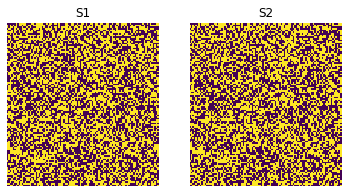

In [11]:
figure = plt.figure(figsize=(6, 3))
figure.add_subplot(1, 2, 1)
plt.title('S1')
plt.axis("off")
plt.pcolor(S1)
figure.add_subplot(1, 2, 2)
plt.title('S2')
plt.axis("off")
plt.pcolor(S2)
print(overlap(S1,S2,N))

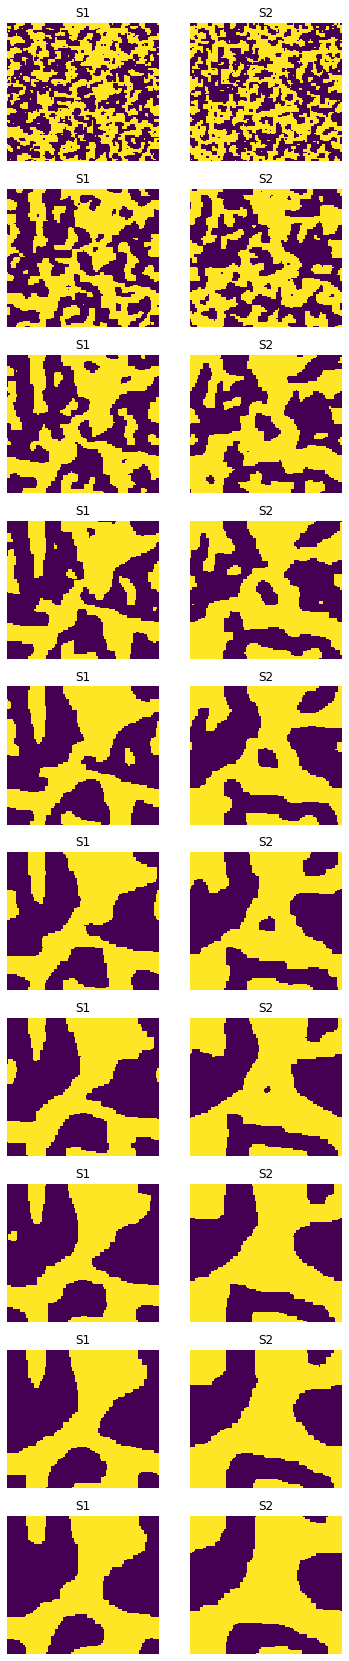

In [12]:
overlaps = []
figure = plt.figure(figsize=(6, 30))
for i in range(10):
    sweep(S1,length,N)
    sweep(S2,length,N)
    overlaps.append(overlap(S1,S2,N))
    figure.add_subplot(10, 2, 2*i+1)
    plt.title('S1')
    plt.axis("off")
    plt.pcolor(S1)
    figure.add_subplot(10, 2, 2*i+2)
    plt.title('S2')
    plt.axis("off")
    plt.pcolor(S2)

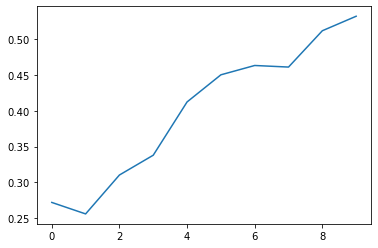

In [20]:
plt.plot(overlaps)

In [14]:
S1_active = get_active(S1,length)
S2_active = get_active(S2,length)

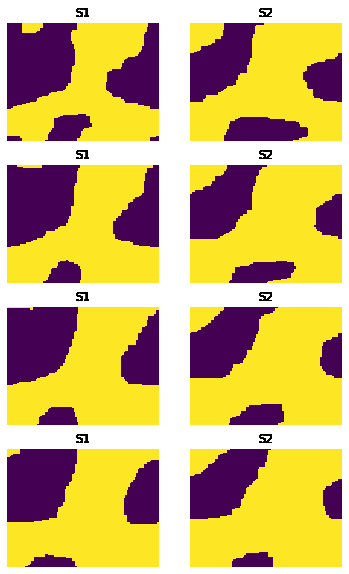

In [15]:
t1 = 0
t2 = 0
figure = plt.figure(figsize=(6, 10))
while True:
    if kineticMonteCarlo(S1,length,S1_active) == 0:
        break
    t1 = t1 + kineticMonteCarlo(S1,length,S1_active)
    if t1 >= 100 and t1 <101:
        figure.add_subplot(4, 2, 1)
        plt.title('S1')
        plt.axis("off")
        plt.pcolor(S1)
    if t1 >= 200 and t1 <201:
        figure.add_subplot(4, 2, 3)
        plt.title('S1')
        plt.axis("off")
        plt.pcolor(S1)
    if t1 >= 300 and t1 <301:
        figure.add_subplot(4, 2, 5)
        plt.title('S1')
        plt.axis("off")
        plt.pcolor(S1)
    if t1 >= 400 and t1 <401:
        figure.add_subplot(4, 2, 7)
        plt.title('S1')
        plt.axis("off")
        plt.pcolor(S1)
while True:
    if kineticMonteCarlo(S2,length,S2_active) == 0:
        break
    t2 = t2 + kineticMonteCarlo(S2,length,S2_active)
    if t2 >= 100 and t2 <101:
        figure.add_subplot(4, 2, 2)
        plt.title('S2')
        plt.axis("off")
        plt.pcolor(S2)
    if t2 >= 200 and t2 <201:
        figure.add_subplot(4, 2, 4)
        plt.title('S2')
        plt.axis("off")
        plt.pcolor(S2)
    if t2 >= 300 and t2 <301:
        figure.add_subplot(4, 2, 6)
        plt.title('S2')
        plt.axis("off")
        plt.pcolor(S2)
    if t2 >= 400 and t2 <401:
        figure.add_subplot(4, 2, 8)
        plt.title('S2')
        plt.axis("off")
        plt.pcolor(S2)

In [16]:
t1

1202.0157329209776

1.0


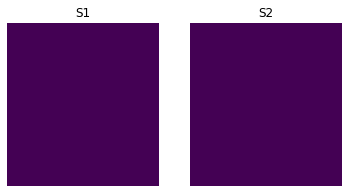

In [17]:
print(overlap(S1,S2,N))
figure = plt.figure(figsize=(6, 3))
figure.add_subplot(1, 2, 1)
plt.title('S1')
plt.axis("off")
plt.pcolor(S1)
figure.add_subplot(1, 2, 2)
plt.title('S2')
plt.axis("off")
plt.pcolor(S2)